In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
df=pd.read_csv('starbucks.csv')


In [3]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [2]:
df.columns


Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [16]:
pd.DataFrame({
    'count':df.shape[0],
    'Nulls':df.isnull().sum(),
    'nulls%':df.isnull().sum()*100,
    'cardinality': df.nunique(),
})

,count,Nulls,nulls%,cardinality
Beverage_category,242,0,0,9
Beverage,242,0,0,33
Beverage_prep,242,0,0,13
Calories,242,0,0,48
Total Fat (g),242,0,0,24
Trans Fat (g),242,0,0,18
Saturated Fat (g),242,0,0,4
Sodium (mg),242,0,0,9
Total Carbohydrates (g),242,0,0,51
Cholesterol (mg),242,0,0,75


In [3]:
filtered_drinks = df[df[' Sugars (g)'] > 80]
filtered_drinks

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0,0.0,0.0,0,25,89,0,83,0.0,0%,0%,0%,0%,0
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5,4.0,0.0,5,340,90,2,84,7.0,10%,0%,20%,35%,145
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145


In [10]:
filtered_drinks = df [(df[' Sugars (g)'] < 25) & (df[' Protein (g) '] > 5)]

# Generate a summary of the filtered data
summary = filtered_drinks.describe()
print(summary)

         Calories  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
count   39.000000       39.000000          39.000000     39.000000   
mean   131.025641        1.094872           0.041026      8.076923   
std     39.589663        1.111175           0.075107      8.930682   
min     60.000000        0.100000           0.000000      0.000000   
25%    100.000000        0.200000           0.000000      0.000000   
50%    130.000000        0.500000           0.000000      5.000000   
75%    150.000000        1.500000           0.100000     12.500000   
max    240.000000        4.500000           0.300000     35.000000   

        Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
count                  39.000000         39.000000           39.000000   
mean                  107.435897         17.897436            0.512821   
std                    41.531088          6.012246            0.683328   
min                    55.000000          9.000000            0.000000   

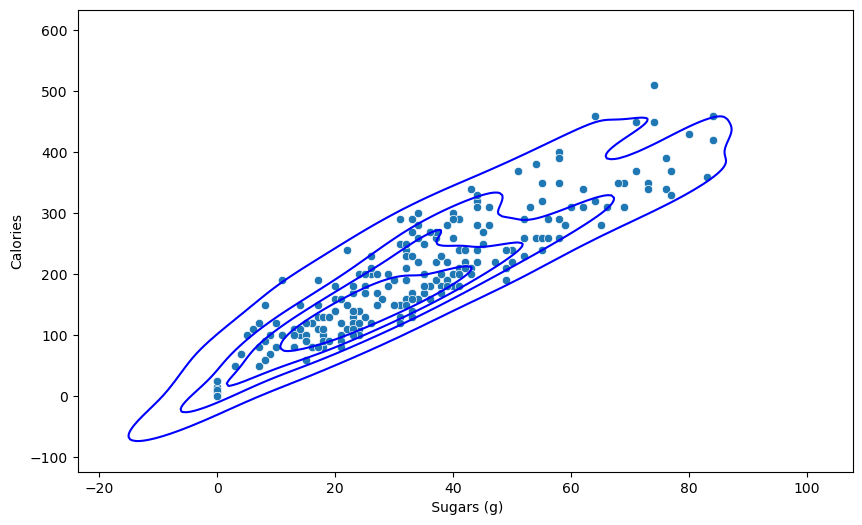

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=' Sugars (g)', y='Calories')
sns.kdeplot(data=df, x=' Sugars (g)', y='Calories', levels=5, color='blue', linewidths=1.5)
plt.show()

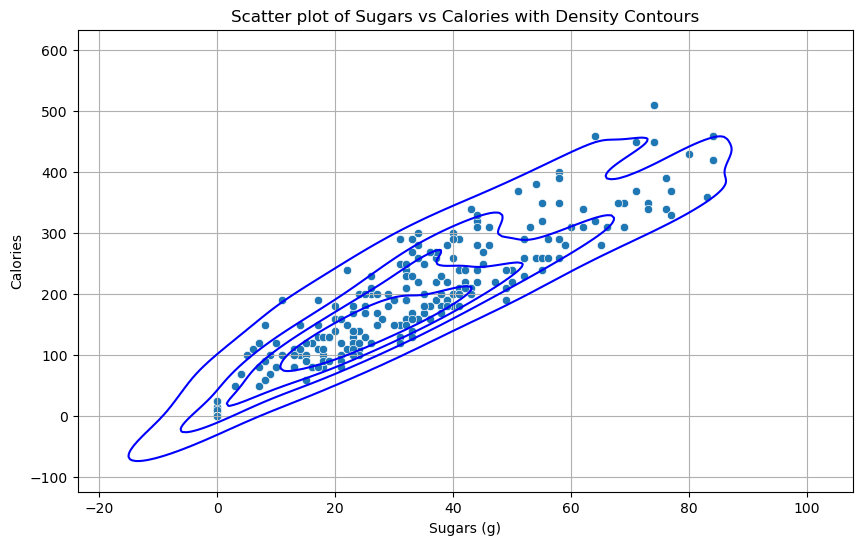

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=' Sugars (g)', y='Calories')

# Add a 2D density plot
sns.kdeplot(data=df, x=' Sugars (g)', y='Calories', levels=5, color='blue', linewidths=1.5)

plt.title('Scatter plot of Sugars vs Calories with Density Contours')
plt.xlabel('Sugars (g)')
plt.ylabel('Calories')
plt.grid(True)
plt.show()

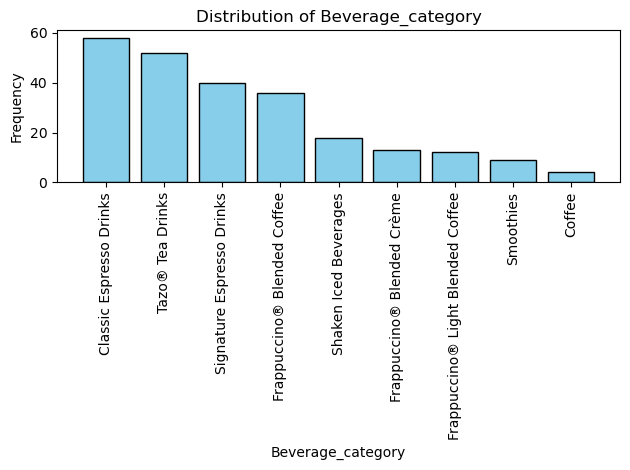

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is my DataFrame containing the data
# Assuming 'Beverage_category' is the column name in my DataFrame

# Counting the frequency of each category
category_counts = df['Beverage_category'].value_counts()

# Plotting
plt.bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Beverage_category')
plt.ylabel('Frequency')
plt.title('Distribution of Beverage_category')
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


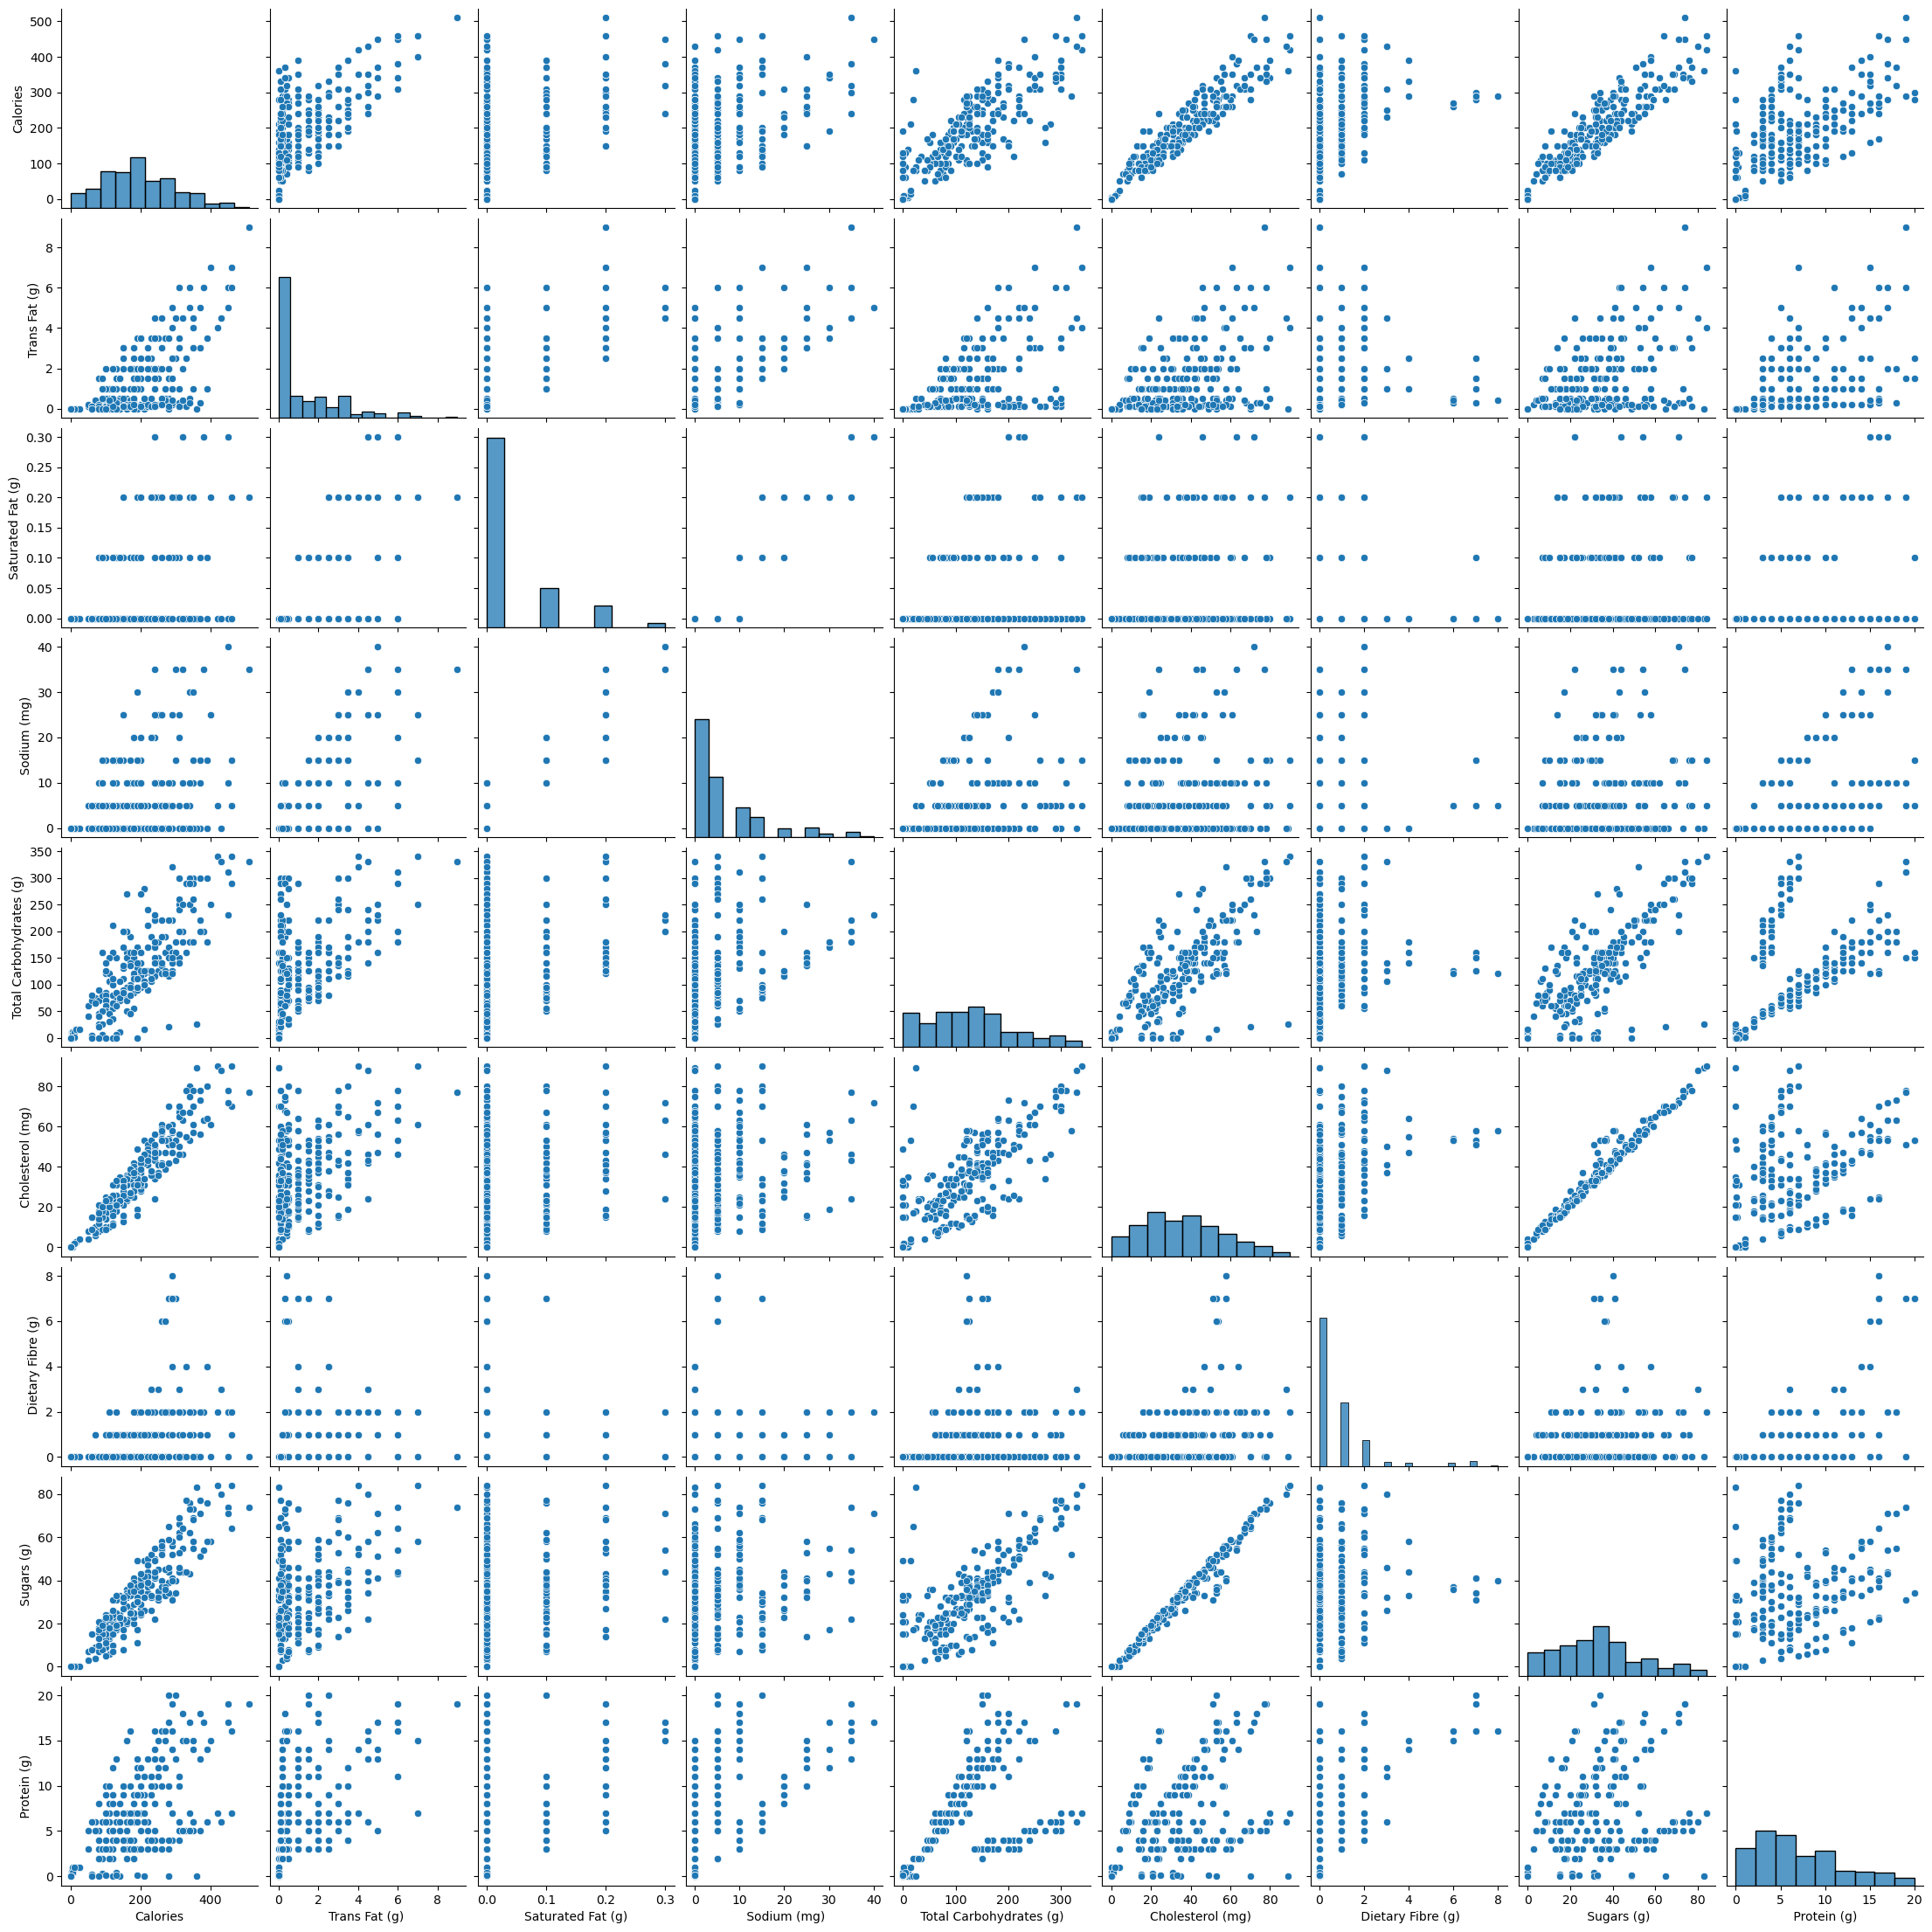

In [4]:
sns.pairplot(df)


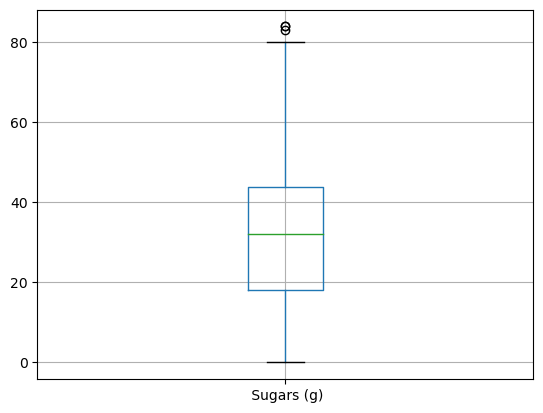

In [5]:
df.boxplot(column=[' Sugars (g)'])
plt.show()


In [6]:
df.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [7]:
df.describe().style.background_gradient(cmap='', colors=['#FF5733', '#F0C808', '#57FF33'])


TypeError: Styler.background_gradient() got an unexpected keyword argument 'colors'

In [19]:
df.describe().style.background_gradient(cmap='RdGy')


,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [29]:
df.columns



Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [52]:
import plotly.express as px

fig = px.pie(df, names='Beverage_category', values=' Sugars (g)', 
             hover_data=['Trans Fat (g) ', 'Saturated Fat (g)'], 
             title='Beverage Category vs Sugar Intakes', color_discrete_sequence=px.colors.qualitative.Bold)

fig.show()

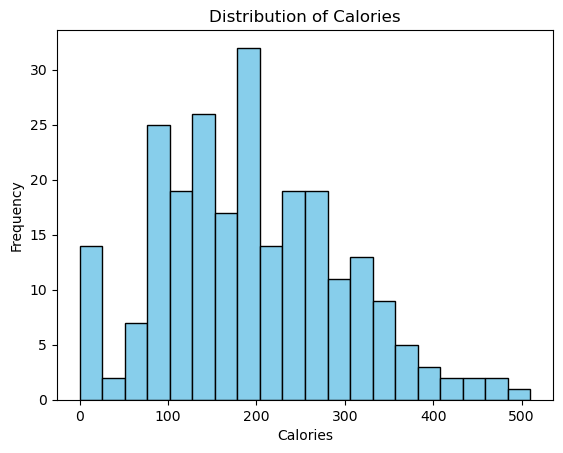

In [40]:
import matplotlib.pyplot as plt

# Histogram for 'Calories'
plt.hist(df['Calories'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories')
plt.show()



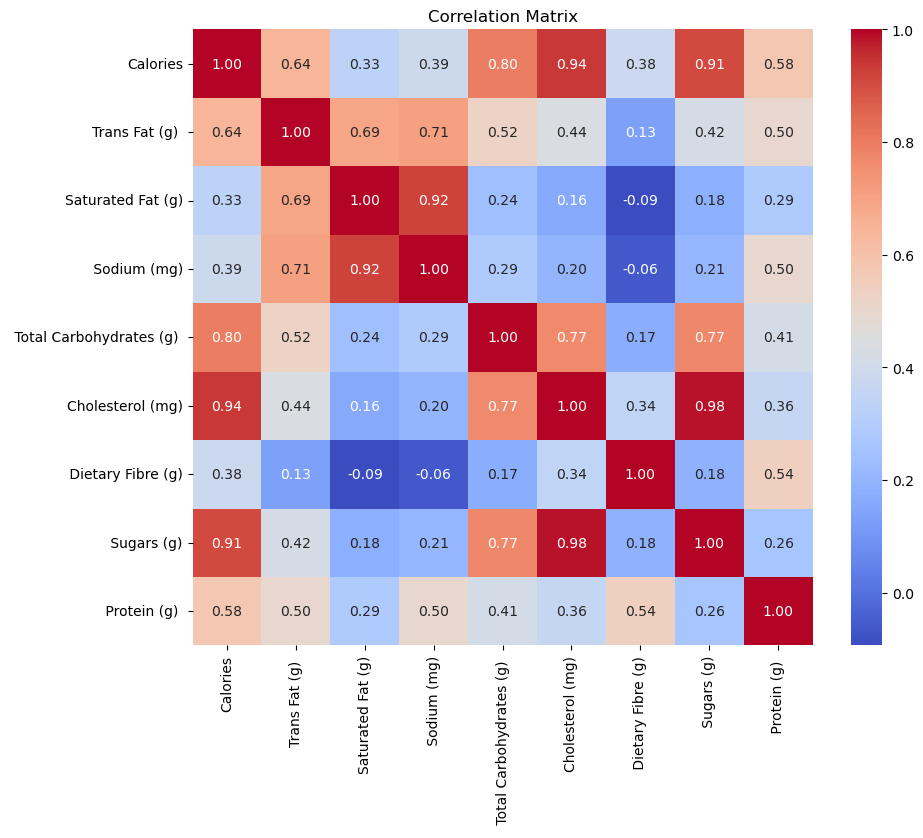

In [46]:
import seaborn as sns

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int', 'float'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


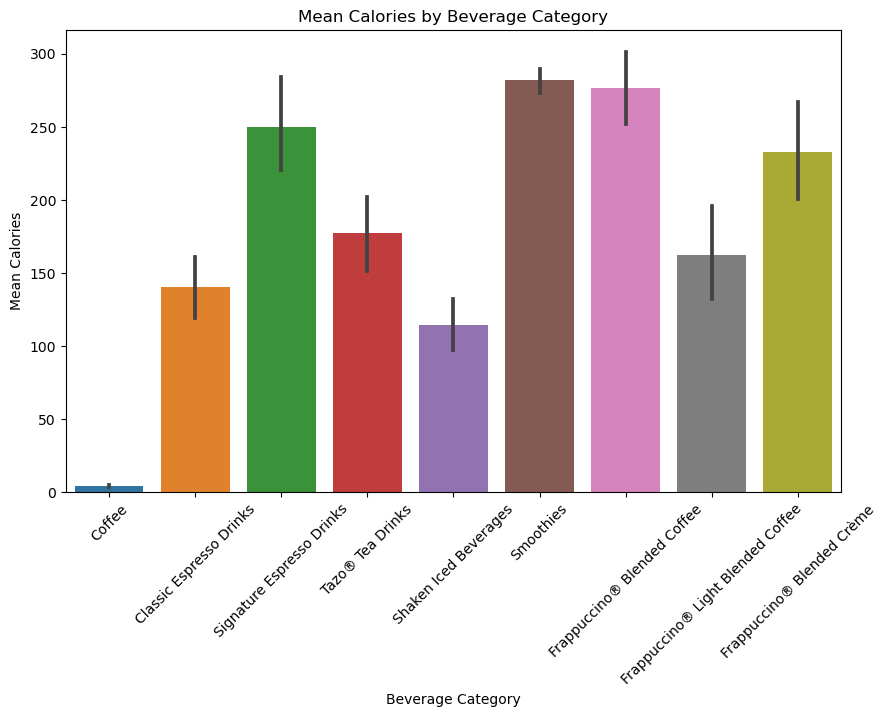

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Beverage_category', y='Calories')
plt.xticks(rotation=45)
plt.xlabel('Beverage Category')
plt.ylabel('Mean Calories')
plt.title('Mean Calories by Beverage Category')
plt.show()

In [48]:
df.columns


Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

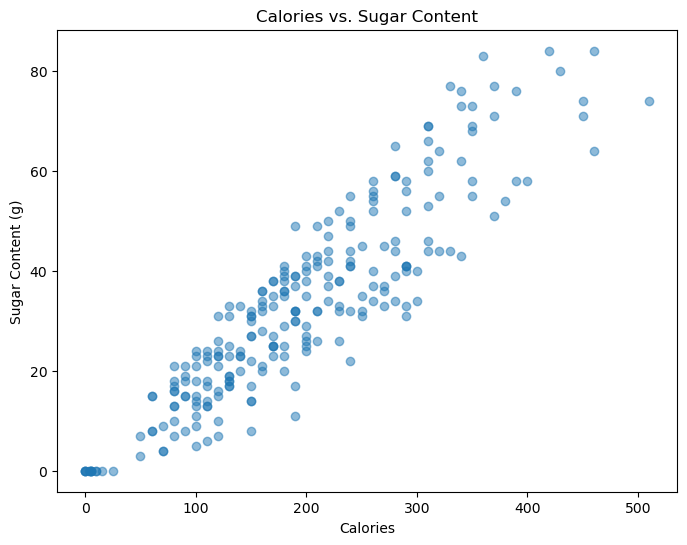

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Calories'], df[' Sugars (g)'], alpha=0.5)
plt.title('Calories vs. Sugar Content')
plt.xlabel('Calories')
plt.ylabel('Sugar Content (g)')
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


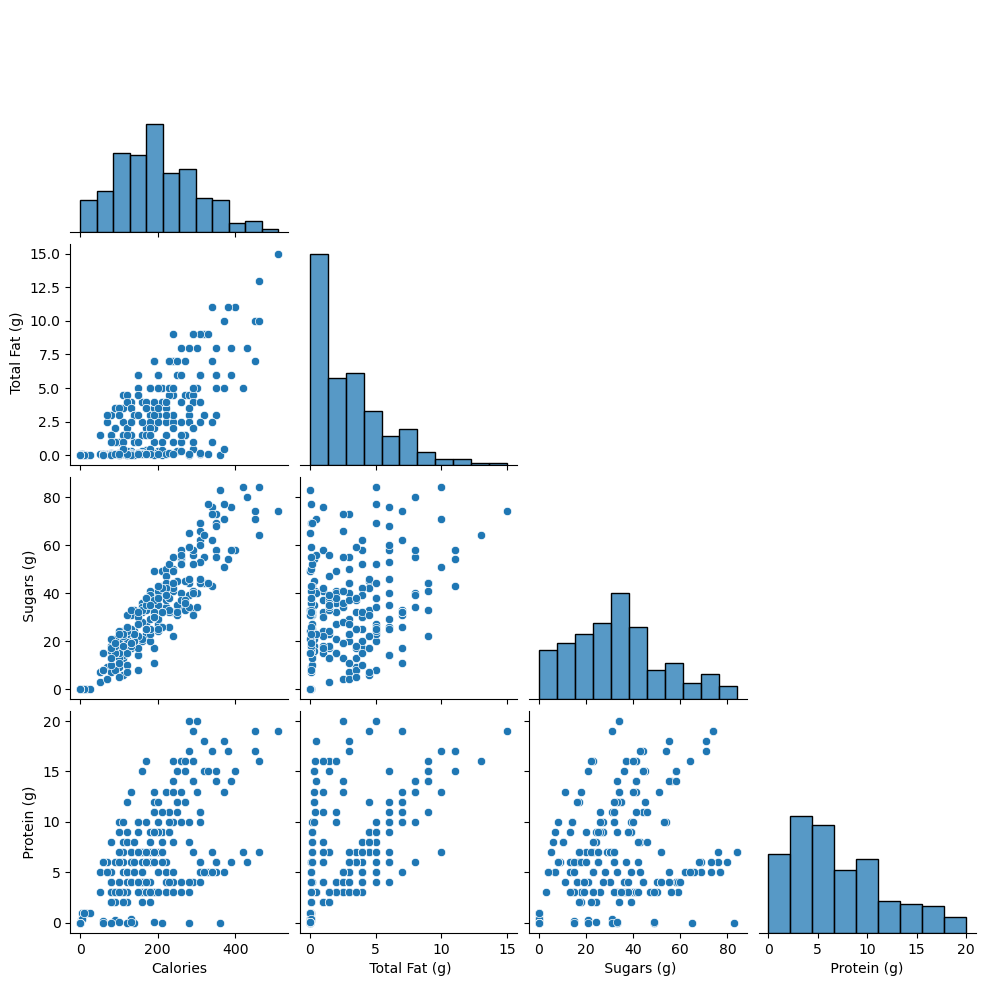

In [12]:
nutri_col = ['Calories', ' Total Fat (g)', ' Sugars (g)', ' Protein (g) ']

correl_df = df[nutri_col].copy()

correl_df[' Total Fat (g)'] = pd.to_numeric(correl_df[' Total Fat (g)'], errors='coerce')

sns.pairplot(data=correl_df, corner=True)
plt.show()

<Axes: xlabel='Beverage_category', ylabel=' Dietary Fibre (g)'>

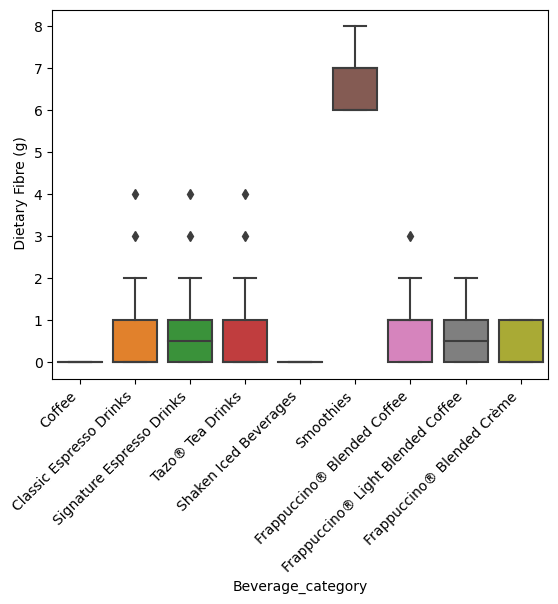

In [14]:
dietary_fib = df.groupby('Beverage_category')[[' Dietary Fibre (g)']]
plt.xticks(rotation=45, ha='right')
sns.boxplot(data=df, x='Beverage_category', y=' Dietary Fibre (g)')

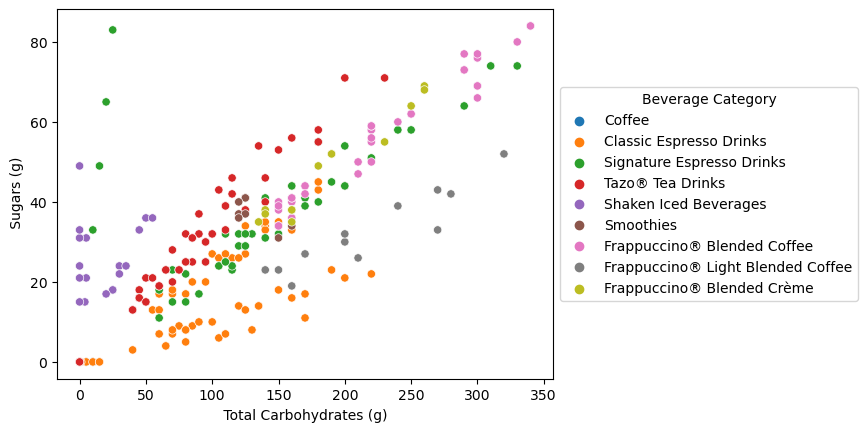

In [20]:
scatterplot = sns.scatterplot(data=df, x=' Total Carbohydrates (g) ', y=' Sugars (g)', hue='Beverage_category')
#modify the legend to be placed outside the plot
scatterplot.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Beverage Category")

plt.show()

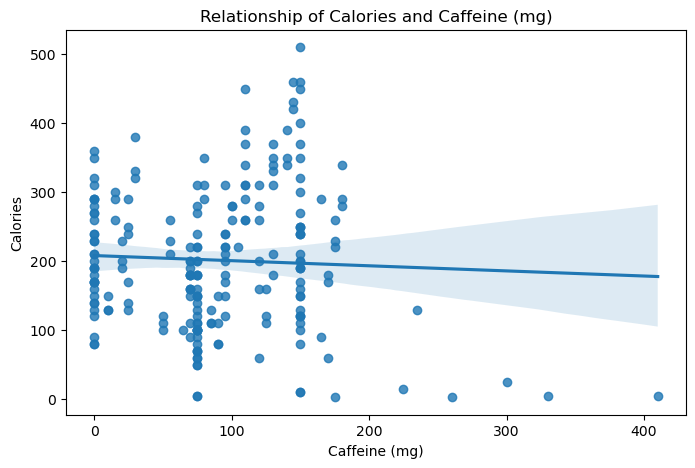

In [20]:
df['Caffeine (mg)'] = pd.to_numeric(df['Caffeine (mg)'], errors='coerce')
df['Caffeine (mg)'].dtypes
plt.figure(figsize=(8,5))

plt.title('Relationship of Calories and Caffeine (mg)')
#plot the Calorie and Caffeine column in a scatterplot with a linear regression line
sns.regplot(df, x='Caffeine (mg)', y='Calories')
plt.show()